# Harmonic Excitation of SDOF Systems

## Exercise 1

Create plots of the response of an undamped system for the first 50 seconds with $\omega_n$ = 0.75 rad/s, $x_0$ = 0.03m and $v_0$ = 0.01 m/s to harmonic excitation of magnitude $f_0$ = 0.2 N/kg at $\omega$ = 2 rad/s and $\omega$ = 4 rad/s.

$$
x(t) = \frac{v_0}{\omega_n} sin(\omega_n t) + \left( x_0 - \frac{f_0}{\omega_n^2-\omega^2} \right) cos(\omega_n t) + \frac{f_0}{\omega_n^2-\omega^2} cos(\omega t)
$$


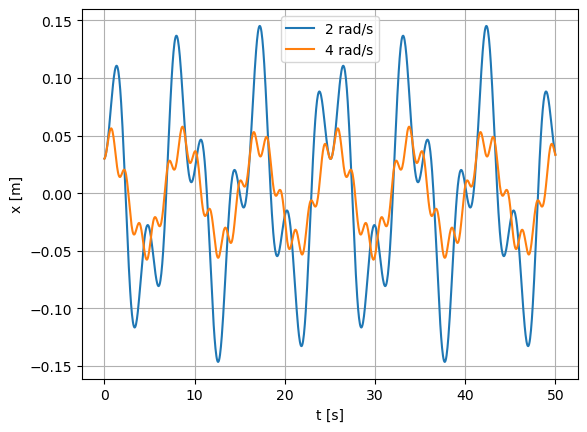

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# given
t = np.linspace(0,50,1000)
## your code for wn, x0, v0, f0, w1, w2


# the response
w = w1
x1 = v0/wn*np.sin(wn*t) + (x0-f0/(wn**2-w**2))*np.cos(wn*t) + f0/(wn**2-w**2)*np.cos(w*t)
w = w2
x2 = v0/wn*np.sin(wn*t) + (x0-f0/(wn**2-w**2))*np.cos(wn*t) + f0/(wn**2-w**2)*np.cos(w*t)

# plots
## your code to plot: plt.plot(*,*,label='w_1')


plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.grid()
plt.legend()
plt.show()

## Exercise 2

A machine component is modelled as a pendulum connected to a spring. This component is driven by a motor that applies a sinusoidal moment $M(t) = 10cos(4\pi t)$ Nm about the axis of rotation.
 The pendulum's mass is 2 kg, the pendulum's length is 0.5 m, and the stiffness of the spring is 20 N/m. Assume that the rod of the pendulum has no mass. The initial angular displacement is 0.17 rad (approx. 10$^\circ$)) measured from the vertical, with no initial angular velocity.

* Derive the equation of motion and find the system’s natural frequency.
*  Plot the response and find the maximum angular displacement.


Natural frequency (wn): 4.7032 rad/s
Max angular displacement: 0.4695 rad


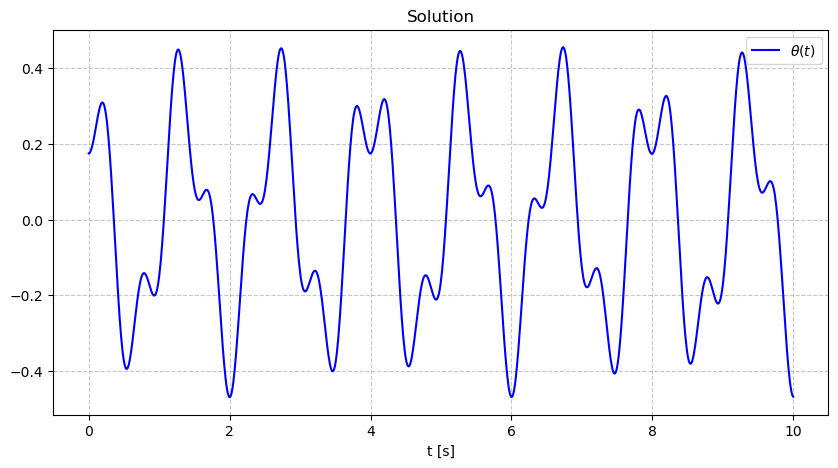

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# given
m = 2.0          
l = 0.5           # m
k = 20.0          # N/m
g = 9.81          # m/s^2
M0 = 10.0         # Nm
w_drive = 4 * np.pi  # excitation frequency (rad/s)

I = m * (l**2)
## your code for wn

print(f"Natural frequency (wn): {wn:.4f} rad/s")

# System of ODEs
def pendulum_system(t, y):
    theta, omega = y
    # d_theta/dt = omega
    # d_omega/dt = (M(t) - M_spring - M_gravity) / I
    ## your code for d_theta and d_omega
    
    
    return [d_theta, d_omega]

y0 = [0.175, 0.0]  # Initial conditions
t_span = (0, 10)    # From 0 to 10 sec
t_eval = np.linspace(0, 10, 1000) # for plot

# Solution of ODEs
sol = solve_ivp(pendulum_system, t_span, y0, t_eval=t_eval, method='RK45')

# Analysis
theta_res = sol.y[0]
max_disp = np.max(np.abs(theta_res))
print(f"Max angular displacement: {max_disp:.4f} rad")

# Plot
plt.figure(figsize=(10, 5))
plt.plot(sol.t, theta_res, label=r'$\theta(t)$', color='blue')
plt.title('Solution')
plt.xlabel('t [s]')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Exercise 3

The phenomenon of beats (and the beat frequency) in physics results from sound wave interference, the interaction between sound waves with different frequencies, and leads to a similar pulsing effect in a tone.

If two sound waves of different frequencies interfere, the result is a variation inloudness  known as beats. Representing sound waves as sine waves, consider the following expressions

$$
y_1 = sin(2 \pi f_1 t)
$$

$$
y_2 = sin(2 \pi f_2 t)
$$

where $f_1$ = 250 Hz and $f_2$ = 255 Hz.

.
Plot the two waves and a ​superposition (the sum)​ of the original waves for the first 0.3 seconds with 1000 points in the interval.


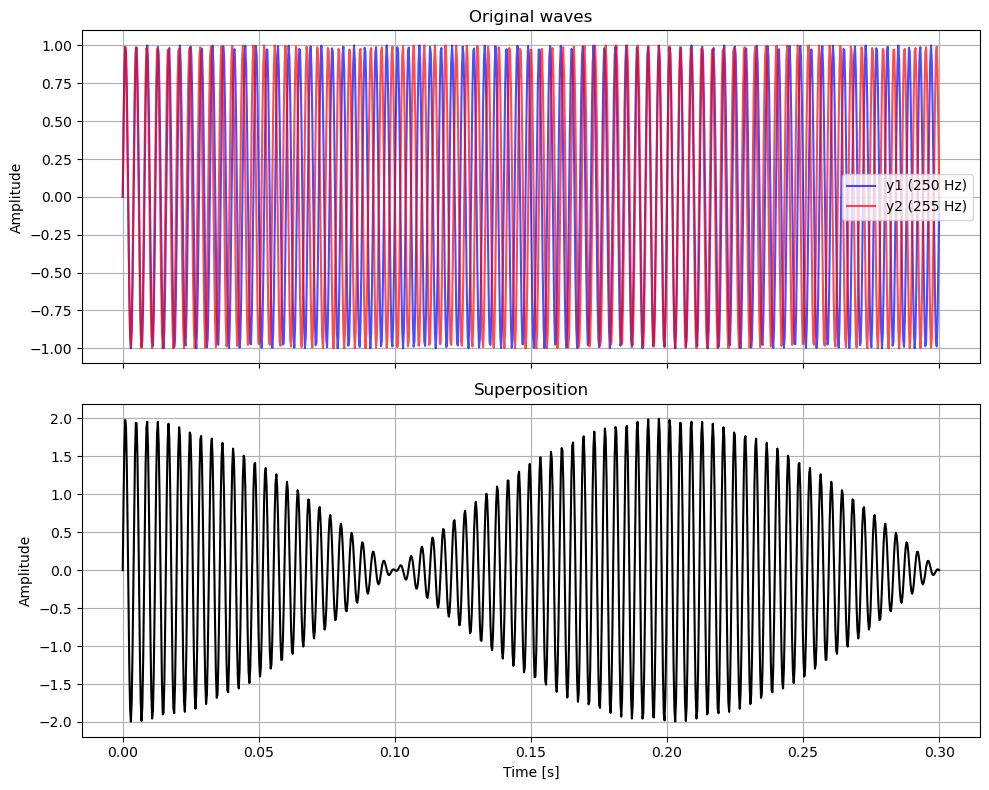

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# waves and superposition
## your code for t, y1, y2 and y_sum



# plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
# top
ax1.plot(t, y1, label='y1 (250 Hz)', color='blue', alpha=0.7)
ax1.plot(t, y2, label='y2 (255 Hz)', color='red', alpha=0.7)
ax1.set_title('Original waves')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(True)
# bottom
ax2.plot(t, y_sum, color='black', linewidth=1.5)
ax2.set_title('Superposition')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Amplitude')
ax2.grid(True)

plt.tight_layout()
plt.show()

## Appendix

Audio playback

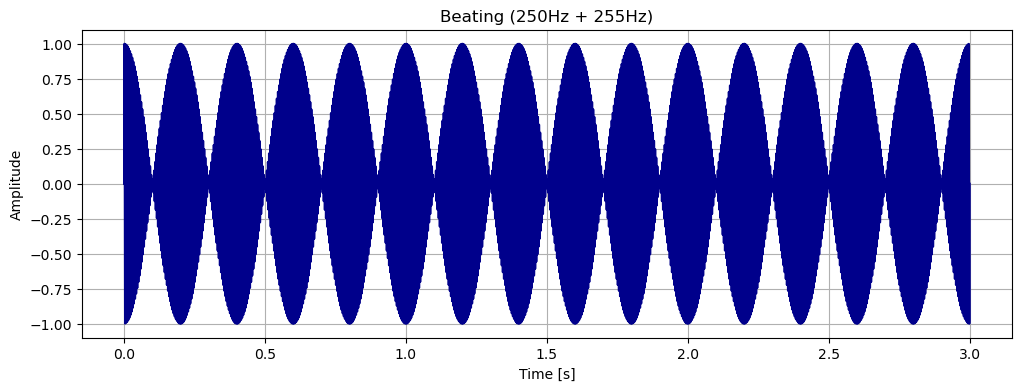

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

# Parameters
fs = 44100       # sampling frequency (standard audio quality)
duration = 3.0   # duration in sec
t = np.linspace(0, duration, int(fs * duration))
f1 = 250         # Hz
f2 = 255         # Hz

# Waves
y1 = np.sin(2 * np.pi * f1 * t)
y2 = np.sin(2 * np.pi * f2 * t)
y_sum = y1 + y2

# Normalisation
y_sum_norm = y_sum / np.max(np.abs(y_sum))

# Visualisation
t_plot = t
y_plot = y_sum_norm[:len(t_plot)]

plt.figure(figsize=(12, 4))
plt.plot(t_plot, y_plot, color='darkblue')
plt.title(f'Beating ({f1}Hz + {f2}Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Audio playback
Audio(y_sum_norm, rate=fs)

## Comments

1. **Acoustic Beat Phenomenon**
   
The phenomenon of beats occurs when two sound waves of slightly different frequencies interfere. This results in a periodic variation in intensity (volume), which the human ear perceives as a pulsing or "throbbing" sound.

2. **Beat Frequency Calculation**
   
The frequency of the beats is equal to the absolute difference between the two original frequencies. In this case, beat frequency = $5 \text{ Hz}$ (you will hear 5 pulses per second).

3. **Trigonometric Derivation (The Envelope)**

Mathematically, the superposition of two sine waves can be explained using the sum-to-product identity:

$$\sin(2\pi f_1 t) + \sin(2\pi f_2 t) = 2 \cos\left(2\pi \frac{f_2 - f_1}{2} t\right) \sin\left(2\pi \frac{f_1 + f_2}{2} t\right)$$

This equation breaks the resulting wave into two parts:
* **The Carrier Tone**: The $\sin$ term represents the average frequency $\frac{f_1 + f_2}{2}$ (the pitch you actually hear).
* **The Envelope**: The $2 \cos$ term represents the slowly varying amplitude (the "envelope") that creates the loud and quiet pulses.

## Exercise 4

An industrial fan with a mass $m$ = 150 kg is mounted on four springs. The fan operates at 1200 RPM (revolutions per minute), generating a harmonic excitation force. Assume light damping $\zeta$ = 0.05.

Your goal is to ensure that less than 20% of the generated force is transmitted to the floor (TR < 0.2). Graphically find the frequency rati $\omega / \omega_n$.

Transmissibility (TR) is defined as the ratio of the force transmitted to the foundation ($F_T$) to the excitation force ($F_0$):

$$
TR = \frac{F_T}{F_0} = \sqrt{\frac{1+(2\zeta \omega / \omega_n)^2}{(1-(\omega/\omega_n)^2)^2+(2\zeta \omega / \omega_n)^2}}
$$:


Excitation Frequency (w): 125.66 rad/s


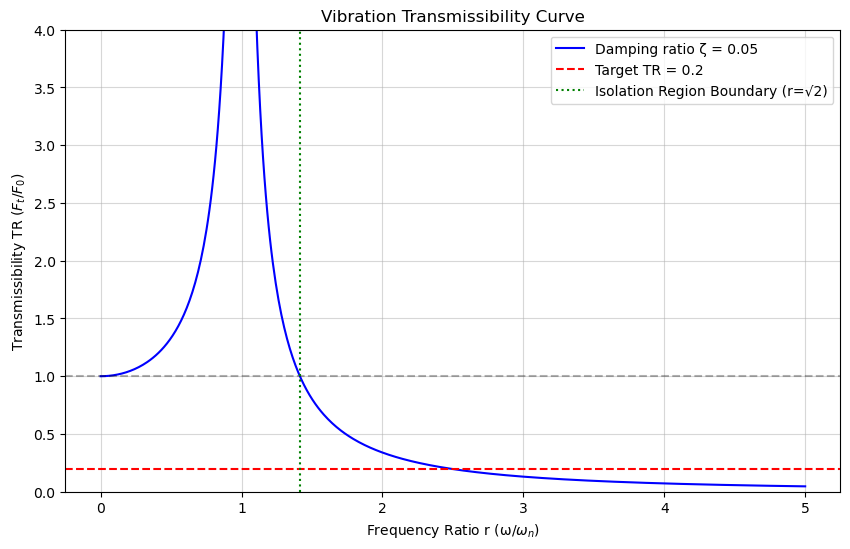

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Given Data
m = 150.0         
rpm = 1200.0
zeta = 0.05        
target_tr = 0.2

# Excitation Frequency (rad/s)
# your code for w_drive


print(f"Excitation Frequency (w): {w_drive:.2f} rad/s")

# Define the Transmissibility Function
def transmissibility(r, zeta):
    # your code for numerator & denominator
    
    
    return numerator / denominator

# Visualization
r_values = np.linspace(0, 5, 500)
tr_values = transmissibility(r_values, zeta)

plt.figure(figsize=(10, 6))
plt.plot(r_values, tr_values, label=f'Damping ratio ζ = {zeta}', color='blue')
plt.axhline(1.0, color='black', linestyle='--', alpha=0.3)
plt.axhline(target_tr, color='red', linestyle='--', label=f'Target TR = {target_tr}')

# Critical theoretical line: r = sqrt(2)
# Isolation occurs only when r > sqrt(2)
plt.axvline(np.sqrt(2), color='green', linestyle=':', label='Isolation Region Boundary (r=√2)')

plt.ylim(0, 4)
plt.title('Vibration Transmissibility Curve')
plt.xlabel('Frequency Ratio r (ω/$ω_n$)')
plt.ylabel('Transmissibility TR ($F_t$/$F_0$)')
plt.legend()
plt.grid(True, which='both', linestyle='-', alpha=0.5)
plt.show()

### Analysis

What happens if you increase the damping ratio $\zeta$?

Why must $\omega/\omega_n$ be greater than $\sqrt{2}$? 


## 5. Uzdevumi patstāvīgai risināšanai

### 5.1 uzdevums

Izmantojot 4. uzdevumu, aprēķini nepieciešamo (vienas) atsperes stingruma koeficientu $k$, lai izpildītu prasību $TR < 0.2$.



### 5.2 uzdevums

Mainot slāpēšanas koeficientu $\zeta$ diapazonā no 0.01 līdz 1.0, parādīt vizuāli, ka pie frekvenču attiecības $r = \sqrt{2}$ visi grafiki krustojas vienā punktā neatkarīgi no slāpēšanas.